# Telegram Activity Example

In [1]:
import os
import sys
import dotenv
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [2]:

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from client.query_api_client import HelixirQueryApi


## Create api client

In [3]:
dotenv.load_dotenv(".env")
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = HelixirQueryApi(auth_token=AUTH_TOKEN, api_server="http://167.235.251.238:3000", api_version="dev")
client

# Get telegram activity

In [4]:
query = """SELECT date_trunc('hour', created_at) as time, count(id) as count
FROM pubs.telegram.messages
where created_at >= timestamp '2022-07-22'
  and created_at <= timestamp '2022-07-30'
  and contains(tags, 'eth')
group by 1
order by 1;"""

response = client.get_data_response(query)
response['time'] = pd.to_datetime(response['time'])
response.set_index('time')
response

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,count,time
0,77,2022-07-22 00:00:00+00:00
1,82,2022-07-22 01:00:00+00:00
2,68,2022-07-22 02:00:00+00:00
3,61,2022-07-22 03:00:00+00:00
4,47,2022-07-22 04:00:00+00:00
...,...,...
187,90,2022-07-29 19:00:00+00:00
188,77,2022-07-29 20:00:00+00:00
189,65,2022-07-29 21:00:00+00:00
190,56,2022-07-29 22:00:00+00:00


# Plot telegram activity

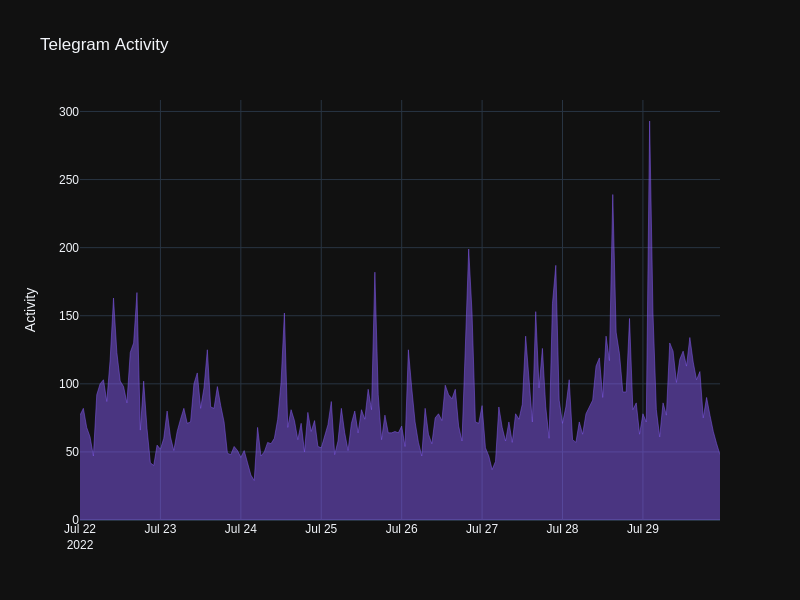

In [5]:
fig = go.Figure()

tg_activity = go.Scatter(x=response['time'],
                         y=response['count'],
                         name="tg activity",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy'
                         )

fig.add_trace(tg_activity)

fig.update_layout(
    width=800, height=600,
    title="Telegram Activity",
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Activity")

fig.show("png")


# Get TOHLCV

In [6]:
tohlcv_query = """SELECT p.bucket as time, open_stable, high_stable, low_stable, close_stable, v.volume
FROM series.chain_bsc.price_ticks_hourly p
         join series.chain_bsc.volume_ticks_hourly v
              on (p.bucket = v.bucket and p.token_id = v.token_id and p.platform_id = v.platform_id)
WHERE p.token_id = token('0x2170Ed0880ac9A755fd29B2688956BD959F933F8')
  and p.platform_id = 1
  and p.bucket > timestamp '2022-07-22'
  and p.bucket < timestamp '2022-07-30'
ORDER BY time;"""

tohlcv_resp = client.get_data_response(tohlcv_query)
tohlcv_resp['time'] = pd.to_datetime(tohlcv_resp['time'])
tohlcv_resp.set_index('time')
tohlcv_resp

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,close_stable,high_stable,low_stable,open_stable,time,volume
0,1579.865192374745,1589.6181158794934,1579.4205737755403,1589.6181158794934,2022-07-22 01:00:00+00:00,101.1542887799202561
1,1569.1709369692958,1580.7617752892734,1569.1709369692958,1579.8411702562184,2022-07-22 02:00:00+00:00,110.2637612765937066
2,1563.5617103840161,1569.2774201684163,1561.6798968198623,1569.2774201684163,2022-07-22 03:00:00+00:00,133.9824741267053001
3,1565.5671837733512,1568.2272652798824,1562.4602835737646,1562.869289208501,2022-07-22 04:00:00+00:00,72.8543399035523715
4,1585.874346772566,1585.874346772566,1565.3551227011008,1565.3551227011008,2022-07-22 05:00:00+00:00,210.5226305261022064
...,...,...,...,...,...,...
186,1719.7426368288623,1729.9763618478596,1712.0562531456214,1723.4999444762266,2022-07-29 19:00:00+00:00,174.2426538371098486
187,1727.9121107044186,1731.4496271749792,1717.3155308518712,1720.426633610394,2022-07-29 20:00:00+00:00,222.8884157758464227
188,1716.4981089992116,1731.3250442678873,1707.3119602760162,1727.778410700245,2022-07-29 21:00:00+00:00,263.8377594709429948
189,1741.0953311153205,1741.124290775803,1714.465714079075,1716.0504405474794,2022-07-29 22:00:00+00:00,204.4073316125190551


# Plot TOHCLV with Telegram Activity

In [7]:
tohlcv_resp['open_stable'] = pd.to_numeric(tohlcv_resp['open_stable'])
tohlcv_resp['high_stable'] = pd.to_numeric(tohlcv_resp['high_stable'])
tohlcv_resp['low_stable'] = pd.to_numeric(tohlcv_resp['low_stable'])
tohlcv_resp['close_stable'] = pd.to_numeric(tohlcv_resp['close_stable'])
tohlcv_resp

,close_stable,high_stable,low_stable,open_stable,time,volume
0,1579.865192,1589.618116,1579.420574,1589.618116,2022-07-22 01:00:00+00:00,101.1542887799202561
1,1569.170937,1580.761775,1569.170937,1579.841170,2022-07-22 02:00:00+00:00,110.2637612765937066
2,1563.561710,1569.277420,1561.679897,1569.277420,2022-07-22 03:00:00+00:00,133.9824741267053001
3,1565.567184,1568.227265,1562.460284,1562.869289,2022-07-22 04:00:00+00:00,72.8543399035523715
4,1585.874347,1585.874347,1565.355123,1565.355123,2022-07-22 05:00:00+00:00,210.5226305261022064
...,...,...,...,...,...,...
186,1719.742637,1729.976362,1712.056253,1723.499944,2022-07-29 19:00:00+00:00,174.2426538371098486
187,1727.912111,1731.449627,1717.315531,1720.426634,2022-07-29 20:00:00+00:00,222.8884157758464227
188,1716.498109,1731.325044,1707.311960,1727.778411,2022-07-29 21:00:00+00:00,263.8377594709429948
189,1741.095331,1741.124291,1714.465714,1716.050441,2022-07-29 22:00:00+00:00,204.4073316125190551


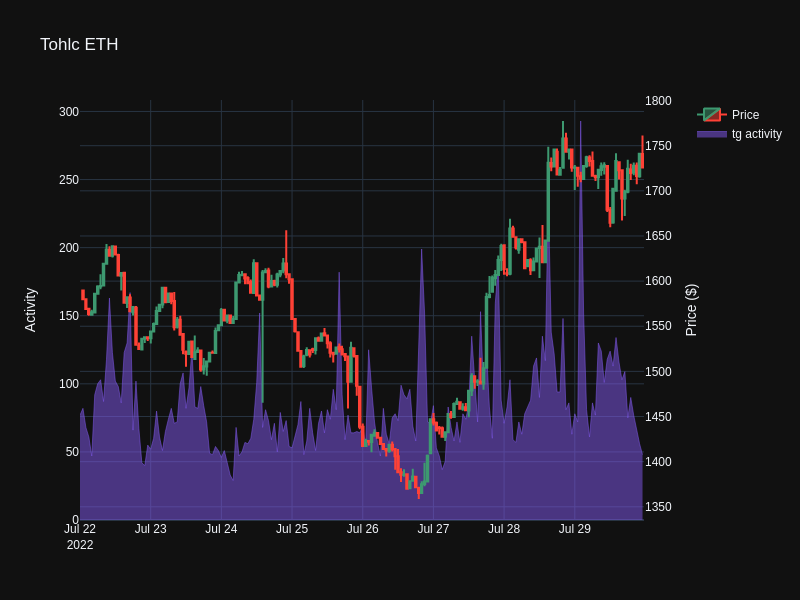

In [8]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

candlestick = go.Candlestick(
    x=tohlcv_resp['time'],
    open=tohlcv_resp['open_stable'],
    high=tohlcv_resp['high_stable'],
    low=tohlcv_resp['low_stable'],
    close=tohlcv_resp['close_stable'],
    name="Price"
)

tg_activity = go.Scatter(x=response['time'],
                         y=response['count'],
                         name="tg activity",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy'
                         )

fig.add_trace(candlestick, secondary_y=True)
fig.add_trace(tg_activity, secondary_y=False)

fig.update_layout(
    width=800, height=600,
    title="Tohlc ETH",
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Activity", secondary_y=False)
fig.update_yaxes(title_text="Price ($)", secondary_y=True)

fig.show("png")